<a href="https://colab.research.google.com/github/Krylze/Data-Science/blob/main/Limpieza_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: montar en drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
def limpieza (dfTitanic):
  #Datos faltantes
  dfTitanic["Embarked"] = dfTitanic["Embarked"].bfill().ffill()
  meanAge = dfTitanic["Age"].mean()
  dfTitanic["Age"] = dfTitanic["Age"].fillna(meanAge)
  dfTitanic.dropna(axis = 1, inplace = True)
  #null = dfTitanic.isna().sum()

  dfTitanic["EmbarkedCity"] = dfTitanic["Embarked"].map({"S":"Southampton", "C":"Cherburgo", "Q":"Queenstown" }) #.map lo que hace es remplazar el variable por su nombre
  #print(dfTitanic)

  #Transformacion de datos
  dfTitanic["Sex"] = dfTitanic["Sex"].astype("category")
  dfTitanic["Embarked"] = dfTitanic["Embarked"].astype("category")
  #print(dfTitanic.info())

  #Datos duplicados
  #print(dfTitanic.duplicated())
  dfTitanic.drop_duplicates()

  return dfTitanic


if __name__ == "__main__":
    dfTitanic = pd.read_csv("/content/drive/MyDrive/Ciencia de Datos/Data/titanic.csv")
    #print(dfTitanic.head(11))
    #print("=============================")
    #print(dfTitanic.info())
    #print("=============================")
    #print(dfTitanic.describe()) #Estadistica
    dfTitanicClean = limpieza(dfTitanic)
    columns =['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'EmbarkedCity']

    dfTitanicFinal = dfTitanicClean[columns]
    print(dfTitanicFinal.sample(5))

     Survived  Pclass     Sex        Age  SibSp  Parch  Ticket     Fare  \
272         1       2  female  41.000000      0      1  250644  19.5000   
517         0       3    male  29.699118      0      0  371110  24.1500   
100         0       3  female  28.000000      0      0  349245   7.8958   
316         1       2  female  24.000000      1      0  244367  26.0000   
116         0       3    male  70.500000      0      0  370369   7.7500   

    Embarked EmbarkedCity  
272        S  Southampton  
517        Q   Queenstown  
100        S  Southampton  
316        S  Southampton  
116        Q   Queenstown  


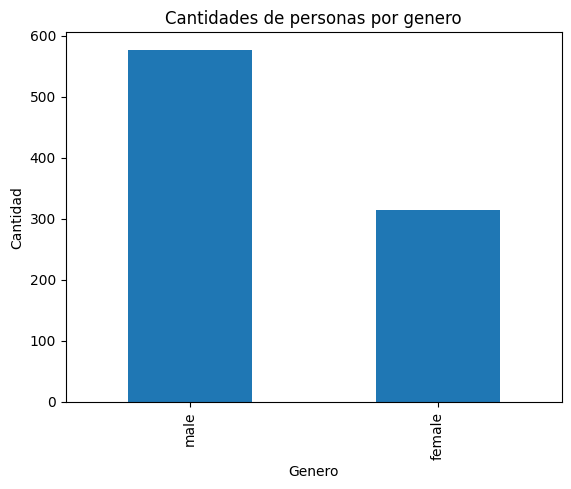

In [ ]:
dfTitanicFinal["Sex"].value_counts().plot(kind = "bar")
plt.title("Cantidades de personas por genero")
plt.xlabel("Genero")
plt.ylabel("Cantidad")
plt.show()

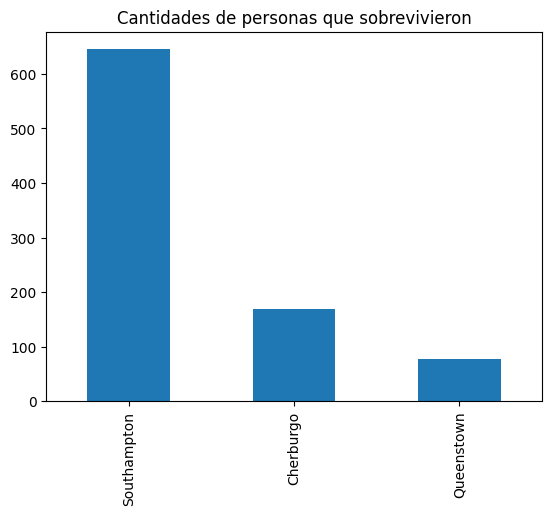

In [ ]:
dfTitanicFinal["EmbarkedCity"].value_counts().plot(kind = "bar")
plt.title("Cantidades de personas que sobrevivieron")
plt.xlabel("")
plt.ylabel("")
plt.show()